<a href="https://colab.research.google.com/github/ReneSRuiz/Mineria_de_datos/blob/main/Outliers_Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Rios = pd.read_csv("RIOS.csv", index_col=0)
Rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


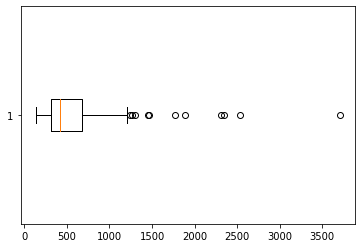

In [3]:
plt.boxplot(Rios["Millas"], vert=False)
plt.show()

In [4]:
Q1=Rios["Millas"].quantile(0.25)
print("Primer cuartil: ",Q1)
Q3=Rios["Millas"].quantile(0.75)
print("Tercer cuartil: ",Q3)
IQR=Q3-Q1
print("Rango intercuartil: ",IQR)
Valor_Min=Rios["Millas"].min()
print("Valor mínimo: ",Valor_Min)
BI_Calculado=Q1-1.5*IQR
print("Bigote inferior: " ,BI_Calculado)
Valor_Max=Rios["Millas"].max()
print("Valor máximo: ",Valor_Max)
BS_Calculado=Q3+1.5*IQR
print("Bigote superior: " ,BS_Calculado)

Primer cuartil:  310.0
Tercer cuartil:  680.0
Rango intercuartil:  370.0
Valor mínimo:  135
Bigote inferior:  -245.0
Valor máximo:  3710
Bigote superior:  1235.0


In [6]:
ubicacion_outliers=(Rios["Millas"]<BI_Calculado) | (Rios["Millas"]>BS_Calculado)
print("Ubicación de outliers\n", ubicacion_outliers)

Ubicación de outliers
 Rio
1      False
2      False
3      False
4      False
5      False
       ...  
137    False
138    False
139    False
140    False
141     True
Name: Millas, Length: 141, dtype: bool


In [7]:
outliers=Rios[ubicacion_outliers]
print("Lista outliers\n", outliers)

Lista outliers
      Millas
Rio        
7      1459
23     1450
25     1243
66     2348
68     3710
69     2315
70     2533
83     1306
98     1270
101    1885
141    1770


In [8]:
ubicacion_sin_outliert= (Rios["Millas"] >= BI_Calculado) & (Rios["Millas"] <= BS_Calculado)
Sin_outliers=Rios[ubicacion_sin_outliert]
Sin_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


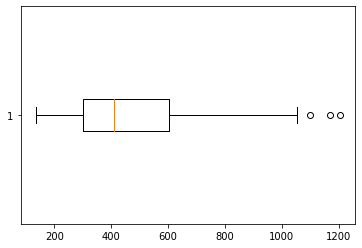

In [9]:
plt.boxplot(Sin_outliers["Millas"], vert=False)
plt.show()